In [1]:
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
os.system('pip install river')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
from river import stream
import time
from statistics import mode

In [ ]:
df = pd.read_csv('/kaggle/input/sample-knn-data/CICIDS2017_sample_km.csv')
df.head()

In [ ]:
df.columns

In [ ]:
df.count

In [ ]:
df.Label.value_counts()

**Corresponding Attack Types:**
* 0 BENIGN   18225
* 3 DoS     3042
* 6 WebAttack   2180
* 1 Bot     1966
* 5 PortScan   1255
* 2 BruteForce   96
* 4 Infiltration   36

In [30]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) 

In [ ]:
pd.Series(y_train).value_counts()

In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

**LightGBM**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.9973880597014926
Precision of LightGBM: 0.9973964590872451
Recall of LightGBM: 0.9973880597014926
Average F1 of LightGBM: 0.9973629910588964
F1 of LightGBM for each type of attack: [0.99822283 0.99224806 1.         0.99836334 0.85714286 0.99354839
 0.99778271]


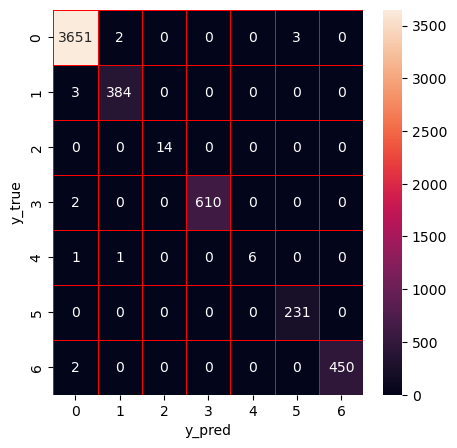

CPU times: user 17.8 s, sys: 3 s, total: 20.8 s
Wall time: 9.75 s


In [34]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**XGBoost**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.9979477611940298
Precision of XGBoost: 0.9979549065880012
Recall of XGBoost: 0.9979477611940298
Average F1 of XGBoost: 0.997921195725638
F1 of XGBoost for each type of attack: [0.99863313 0.99351492 1.         1.         0.85714286 0.99354839
 0.99778271]


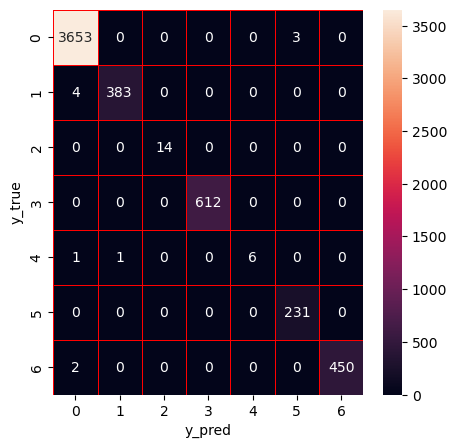

CPU times: user 1min 6s, sys: 226 ms, total: 1min 6s
Wall time: 1min 6s


In [35]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**CatBoost**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      0.99       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of CatBoost: 0.9966417910447761
Precision of CatBoost: 0.9966457193764396
Recall of CatBoost: 0.9966417910447761
Average F1 of CatBoost: 0.99661603515491
F1 of CatBoost for each type of attack: [0.99781241 0.99353169 1.         0.99673203 0.85714286 0.99137931
 0.9944629 ]


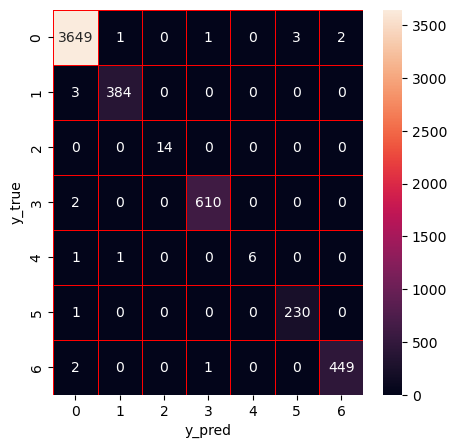

CPU times: user 4min 32s, sys: 3.7 s, total: 4min 35s
Wall time: 1min 11s


In [36]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**AdaBoost**

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      3656
           1       0.00      0.00      0.00       387
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00       612
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00       231
           6       0.00      0.00      0.00       452

    accuracy                           0.68      5360
   macro avg       0.10      0.14      0.12      5360
weighted avg       0.47      0.68      0.55      5360

Accuracy of AdaBoost: 0.682089552238806
Precision of AdaBoost: 0.46524615727333485
Recall of AdaBoost: 0.682089552238806
Average F1 of AdaBoost: 0.5531764425432729
F1 of AdaBoost for each type of attack: [0.81100266 0.         0.         0.         0.         0.
 0.        ]


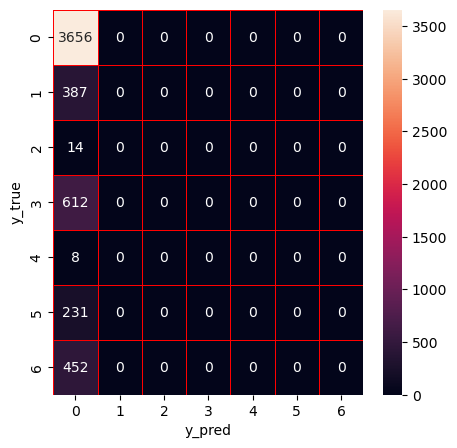

CPU times: user 9.54 s, sys: 168 ms, total: 9.71 s
Wall time: 9.47 s


In [52]:
%%time
#Train with AdaBoost Algorithm
from sklearn.ensemble  import AdaBoostClassifier

ada_classifer = AdaBoostClassifier(learning_rate = 0.01,
                                     n_estimators = 100,
                                     random_state=42)
ada_model = ada_classifer.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print(classification_report(y_test,y_pred))
print("Accuracy of AdaBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of AdaBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of AdaBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of AdaBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of AdaBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
ada_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**GradBoost**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.98      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.62      0.77         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.94      0.96      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of GradBoost: 0.9968283582089552
Precision of GradBoost: 0.9968408780693236
Recall of GradBoost: 0.9968283582089552
Average F1 of GradBoost: 0.996762445603187
F1 of GradBoost for each type of attack: [0.99767791 0.9921875  1.         0.99672668 0.76923077 0.99354839
 0.99889258]


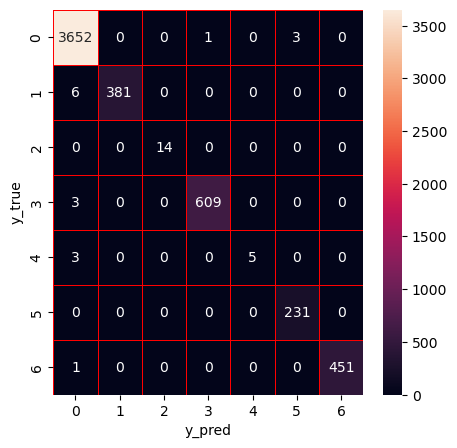

CPU times: user 10min 32s, sys: 188 ms, total: 10min 33s
Wall time: 10min 32s


In [53]:
%%time
#Train with GradBoost Algorithm
from sklearn.ensemble import GradientBoostingClassifier

GBC_classifier = GradientBoostingClassifier(learning_rate = 0.1,
                                     max_depth = 3,
                                     min_samples_leaf = 5,
                                     min_samples_split = 4,
                                     n_estimators = 500,
                                     random_state=42)
GBC_model = GBC_classifier.fit(X_train, y_train)

y_pred = GBC_model.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of GradBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of GradBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of GradBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of GradBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of GradBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
grad_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [54]:
model=[]
for i in range(len(lg_f1)):
    if max(lg_f1[i],xg_f1[i],cb_f1[i],ada_f1[i],grad_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i],ada_f1[i],grad_f1[i]) == xg_f1[i]:
        model.append(xg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i],ada_f1[i],grad_f1[i]) == cb_f1[i]:
        model.append(cb)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i],ada_f1[i],grad_f1[i]) == ada_f1[i]:
        model.append(ada_model)
    else:
        model.append(GBC_model)

In [55]:
model

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
               predictor='auto', random_state=0, reg_alpha=0, ...),
 LGBMClassifier(),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_i

**Leading Model for Each Type of Attack:**
* 0 BENIGN:         XGBClassifier
* 1 Bot:            CBClassifier
* 2 BruteForce:     LGBMClassifier
* 3 DoS:            XGBClassifier
* 4 Infiltration:   LGBMClassifier
* 5 PortScan:       LGBMClassifier
* 6 WebAttack:      GBClassifier

In [56]:
def LCCDE(X_test, y_test, m1, m2, m3, m4, m5):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])
        y_pred4 = m4.predict(xi2.reshape(1, -1))      # model 4 (AdaBoost) makes a prediction on text sample xi
        y_pred4 = int(y_pred4[0])
        y_pred5 = m5.predict(xi2.reshape(1, -1))      # model 5 (GradBoost) makes a prediction on text sample xi
        y_pred5 = int(y_pred5[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1 
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2  
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3 
        p4 = m4.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 4  
        p5 = m5.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 5 

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)
        y_pred_p4 = np.max(p4)
        y_pred_p5 = np.max(p5)

        if y_pred1 == y_pred2 == y_pred3 == y_pred4 == y_pred5: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 

        elif y_pred1 != y_pred2 != y_pred3 != y_pred4 != y_pred5: # If the predicted classes of all the three models are different
            
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)
            
            if model[y_pred4]==m4: # If they are the same and the leading model is model 2 (AdaBoost)
                l.append(m4)
                pred_l.append(y_pred4)
                pro_l.append(y_pred_p4)

            if model[y_pred5]==m5: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m5)
                pred_l.append(y_pred5)
                pro_l.append(y_pred_p5)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3,y_pred_p4,y_pred_p5]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0]

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence
                
                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                elif max_p == y_pred_p3:
                    y_pred = y_pred3
                elif max_p == y_pred_p4:
                    y_pred = y_pred4
                else:
                    y_pred = y_pred5  
        
        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0]) 

        yt.append(yi)
        yp.append(y_pred)
    return yt, yp

In [57]:
%%time
yt, yp = LCCDE(X_test, y_test, m1 = lg, m2 = xg, m3 = cb, m4 = ada_model, m5 = GBC_model)

CPU times: user 3min 37s, sys: 4.18 s, total: 3min 41s
Wall time: 3min 33s


In [58]:
# The performance of the proposed lCCDE model
print("Accuracy of LCCDE: "+ str(accuracy_score(yt, yp)))
print("Precision of LCCDE: "+ str(precision_score(yt, yp, average='weighted')))
print("Recall of LCCDE: "+ str(recall_score(yt, yp, average='weighted')))
print("Average F1 of LCCDE: "+ str(f1_score(yt, yp, average='weighted')))
print("F1 of LCCDE for each type of attack: "+ str(f1_score(yt, yp, average=None)))

Accuracy of LCCDE: 0.9981343283582089
Precision of LCCDE: 0.9981409642565935
Recall of LCCDE: 0.9981343283582089
Average F1 of LCCDE: 0.9981079075490825
F1 of LCCDE for each type of attack: [0.99876965 0.99351492 1.         1.         0.85714286 0.99354839
 0.99889258]


In [59]:
# Comparison: The F1-scores for each base model
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))
print("F1 of AdaBoost for each type of attack: "+ str(ada_f1))
print("F1 of GradBoost for each type of attack: "+ str(grad_f1))

F1 of LightGBM for each type of attack: [0.99822283 0.99224806 1.         0.99836334 0.85714286 0.99354839
 0.99778271]
F1 of XGBoost for each type of attack: [0.99863313 0.99351492 1.         1.         0.85714286 0.99354839
 0.99778271]
F1 of CatBoost for each type of attack: [0.99781241 0.99353169 1.         0.99673203 0.85714286 0.99137931
 0.9944629 ]
F1 of AdaBoost for each type of attack: [0.81100266 0.         0.         0.         0.         0.
 0.        ]
F1 of GradBoost for each type of attack: [0.99767791 0.9921875  1.         0.99672668 0.76923077 0.99354839
 0.99889258]
